In [28]:
# Imports
import json
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression 
from sklearn.metrics import (
                            classification_report, mean_absolute_error, mean_squared_error, r2_score, 
                            accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
                            )
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')
print("✅ Imports loaded")

✅ Imports loaded


In [29]:
ARTIFACTS_DIR = Path("artifacts")
FIGURES_DIR = Path("artifacts/figures")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [30]:
X_train_reg_views = np.load(ARTIFACTS_DIR / 'X_train_reg_Views.npz')['data']
X_test_reg_views = np.load(ARTIFACTS_DIR / 'X_test_reg_Views.npz')['data']
y_train_reg_views = np.load(ARTIFACTS_DIR / 'y_train_reg_Views.npz')['data']
y_test_reg_views = np.load(ARTIFACTS_DIR / 'y_test_reg_Views.npz')['data']

X_train_reg_likes = np.load(ARTIFACTS_DIR / 'X_train_reg_Likes.npz')['data']
X_test_reg_likes = np.load(ARTIFACTS_DIR / 'X_test_reg_Likes.npz')['data']
y_train_reg_likes = np.load(ARTIFACTS_DIR / 'y_train_reg_Likes.npz')['data']
y_test_reg_likes = np.load(ARTIFACTS_DIR / 'y_test_reg_Likes.npz')['data']

X_train_reg_comments = np.load(ARTIFACTS_DIR / 'X_train_reg_Comments.npz')['data']
X_test_reg_comments = np.load(ARTIFACTS_DIR / 'X_test_reg_Comments.npz')['data']
y_train_reg_comments = np.load(ARTIFACTS_DIR / 'y_train_reg_Comments.npz')['data']
y_test_reg_comments = np.load(ARTIFACTS_DIR / 'y_test_reg_Comments.npz')['data']

X_train_reg_shares = np.load(ARTIFACTS_DIR / 'X_train_reg_Shares.npz')['data']
X_test_reg_shares = np.load(ARTIFACTS_DIR / 'X_test_reg_Shares.npz')['data']
y_train_reg_shares = np.load(ARTIFACTS_DIR / 'y_train_reg_Shares.npz')['data']
y_test_reg_shares = np.load(ARTIFACTS_DIR / 'y_test_reg_Shares.npz')['data']

X_train_cls = np.load(ARTIFACTS_DIR / 'X_train_cls_classification.npz')['data']
X_test_cls = np.load(ARTIFACTS_DIR / 'X_test_cls_classification.npz')['data']
y_train_cls = np.load(ARTIFACTS_DIR / 'y_train_cls_classification.npz')['data']
y_test_cls = np.load(ARTIFACTS_DIR / 'y_test_cls_classification.npz')['data']




print("Regression arrays loaded for Views:")
print(f"   X_train : {X_train_reg_views.shape}, X_test : {X_test_reg_views.shape}")
print(f"   y_train : {y_train_reg_views.shape}, y_test : {y_test_reg_views.shape}")

print("Regression arrays loaded for Likes:")
print(f"   X_train : {X_train_reg_likes.shape}, X_test : {X_test_reg_likes.shape}")
print(f"   y_train : {y_train_reg_likes.shape}, y_test : {y_test_reg_likes.shape}")

print("Regression arrays loaded for Shares:")
print(f"   X_train : {X_train_reg_shares.shape}, X_test : {X_test_reg_shares.shape}")
print(f"   y_train : {y_train_reg_shares.shape}, y_test : {y_test_reg_shares.shape}")

print("Regression arrays loaded for Comments:")
print(f"   X_train : {X_train_reg_comments.shape}, X_test : {X_test_reg_comments.shape}")
print(f"   y_train : {y_train_reg_comments.shape}, y_test : {y_test_reg_comments.shape}")

print("\nClassification arrays loaded:")
print(f"   X_train : {X_train_cls.shape}, X_test : {X_test_cls.shape}")
print(f"   y_train : {y_train_cls.shape}, y_test : {y_test_cls.shape}")


# Load FEATURE NAMES

with open(ARTIFACTS_DIR / "feature_names-classification.json", "r") as f:
    feature_names_cls = json.load(f)
    
with open(ARTIFACTS_DIR / "feature_names-Views.json", "r") as f:
    feature_names_reg_views = json.load(f)
    
with open(ARTIFACTS_DIR / "feature_names-Likes.json", "r") as f:
    feature_names_reg_likes = json.load(f)
    
with open(ARTIFACTS_DIR / "feature_names-Shares.json", "r") as f:
    feature_names_reg_shares = json.load(f)

with open(ARTIFACTS_DIR / "feature_names-Comments.json", "r") as f:
    feature_names_reg_comments = json.load(f)
    




# TODO : Implement confusion matrix visualization function

Regression arrays loaded for Views:
   X_train : (3784, 53), X_test : (946, 53)
   y_train : (3784,), y_test : (946,)
Regression arrays loaded for Likes:
   X_train : (3784, 53), X_test : (946, 53)
   y_train : (3784,), y_test : (946,)
Regression arrays loaded for Shares:
   X_train : (3784, 53), X_test : (946, 53)
   y_train : (3784,), y_test : (946,)
Regression arrays loaded for Comments:
   X_train : (3784, 53), X_test : (946, 53)
   y_train : (3784,), y_test : (946,)

Classification arrays loaded:
   X_train : (3784, 50), X_test : (946, 50)
   y_train : (3784,), y_test : (946,)


In [31]:
X_train_df = pd.DataFrame(X_train_reg_views)
X_train_df.head(100)

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-1.324862,-0.061558,1.342143,-0.785723,0.468561,1.979219,1.791705,-1.031785,-1.294538,-1.405355,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.548641,-0.402533,-1.034651,0.573057,-1.786181,-0.883814,1.551390,0.718034,-0.471216,1.755303,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.217937,-0.684645,-0.452817,-0.589055,-1.786181,1.979219,0.562334,0.718034,-1.294538,-1.454774,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.788329,-1.121102,0.195195,0.923092,-1.786181,0.014246,-0.139697,0.718034,-1.684183,0.012497,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.219738,-0.573932,-0.630838,-0.246234,0.735380,0.014246,-1.100668,-0.956804,-1.684183,-0.773091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.440279,0.757031,1.712516,0.243388,0.470941,-0.883814,-0.066416,1.200298,-0.471216,-0.124690,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
96,0.745412,-0.505063,0.851849,0.573057,-1.786181,-0.608507,1.551390,0.718034,0.681186,1.755303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
97,-0.867956,-0.222504,0.132249,-0.246234,0.470941,-0.131382,-1.100668,1.200298,1.269466,-0.773091,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
98,-0.001461,1.594152,-0.853258,0.573057,0.735380,-0.883814,1.551390,-0.956804,-0.471216,1.755303,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
y_train_df = pd.DataFrame(y_train_reg_views)
y_train_df.head(100)

,0
0,826021
1,338623
2,4754509
3,4892331
4,3399161
...,...
95,4290567
96,459654
97,3079923
98,4171736


In [33]:
X_train_views_df = pd.DataFrame(X_train_reg_views)



constant_cols = [c for c in X_train_views_df.columns if X_train_views_df[c].nunique() <= 1]
constant_cols


[]

## Regression Baseline

In [34]:
class SupervisedBaselineModels:
    def __init__(self, X_train, X_test, y_train, y_test, feature_names, task, pred):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.feature_names = feature_names
        self.task = task
        self.pred = pred
        
        # Baseline Regression Models
        self.reg_models = {
            'LinearRegression': LinearRegression(),
            'Ridge_1': Ridge(alpha=1, random_state=RANDOM_STATE),
            'Ridge_10': Ridge(alpha=10, random_state=RANDOM_STATE),
            'Ridge_100': Ridge(alpha=100, random_state=RANDOM_STATE),
        }
        
        # Baseline Classification Models
        self.cls_models = { 
                           'LogisticRegression': LogisticRegression( 
                                                    multi_class='multinomial', 
                                                    max_iter=200, 
                                                    random_state=RANDOM_STATE, 
                                                    class_weight="balanced" ), 
                           'DecisionTree': DecisionTreeClassifier( 
                                                    class_weight="balanced", #Reduced class imbalances
                                                    max_depth=6, 
                                                    random_state=RANDOM_STATE ), 
                           }

        
        self.reg_results = []
        self.cls_results = []
        
        
    # -------------------------------------------------
    # TRAIN & EVALUATE
    # -------------------------------------------------
    def train_and_evaluate(self):
        
        # -------------------------------------------------
        # REGRESSION
        # -------------------------------------------------
        if self.task == 'regression':
        
            
            for name, model in self.reg_models.items():
                print(f"\n🔵 Training {name} ...")
                model.fit(self.X_train, self.y_train)

                # Predictions
                y_pred_train = model.predict(self.X_train)
                y_pred_test = model.predict(self.X_test)

                # Metrics
                train_mae = mean_absolute_error(self.y_train, y_pred_train)
                test_mae = mean_absolute_error(self.y_test, y_pred_test)

                train_rmse = np.sqrt(mean_squared_error(self.y_train, y_pred_train))
                test_rmse = np.sqrt(mean_squared_error(self.y_test, y_pred_test))

                train_r2 = r2_score(self.y_train, y_pred_train)
                test_r2 = r2_score(self.y_test, y_pred_test)

                # Save Results
                self.reg_results.append({
                    'Model': name,
                    'Train MAE': train_mae,
                    'Train RMSE': train_rmse,
                    'Train R2': train_r2,
                    'Test MAE': test_mae,
                    'Test RMSE': test_rmse,   
                    'Test R2': test_r2
                })

                print(f"   Test MAE: {test_mae:.2f} | Test RMSE: {test_rmse:.2f} | Test R2: {test_r2:.2f}")

        
        # -------------------------------------------------
        # CLASSIFICATION
        # -------------------------------------------------
        if self.task == 'classification':
            for name, model in self.cls_models.items():
                print(f"\n🟢 Training {name} ...")
                model.fit(self.X_train, self.y_train)

                # Predictions
                y_pred_train = model.predict(self.X_train)
                y_pred_test = model.predict(self.X_test)

                # Metrics
                train_acc = accuracy_score(self.y_train, y_pred_train)
                test_acc = accuracy_score(self.y_test, y_pred_test)

                train_precision = precision_score(self.y_train, y_pred_train, average='weighted')
                test_precision = precision_score(self.y_test, y_pred_test, average='weighted')

                train_recall = recall_score(self.y_train, y_pred_train, average='weighted')
                test_recall = recall_score(self.y_test, y_pred_test, average='weighted')

                train_f1 = f1_score(self.y_train, y_pred_train, average='weighted')
                test_f1 = f1_score(self.y_test, y_pred_test, average='weighted')

                # Save Results
                self.cls_results.append({
                    'Model': name,
                    'Train Accuracy': train_acc,
                    'Train Precision': train_precision,
                    'Train Recall': train_recall,
                    'Train F1 Score': train_f1,
                    'Test Accuracy': test_acc,
                    'Test Precision': test_precision,
                    'Test Recall': test_recall,
                    'Test F1 Score': test_f1
                })

                
                print(f"   Test Accuracy: {test_acc:.2f} | Test Precision: {test_precision:.2f} | Test Recall: {test_recall:.2f} | Test F1: {test_f1:.2f}")
                
                print("\n================ TRAIN METRICS ================\n")
                print(classification_report(self.y_train, y_pred_train))

                print("\n================ TEST METRICS ================\n")
                print(classification_report(self.y_test, y_pred_test))

                # Confusion Matrix (test)
                print("\n============== TEST CONFUSION MATRIX ==============\n")
                cm = confusion_matrix(self.y_test, y_pred_test)
                print(cm)
                sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
                plt.title(F"Confusion Matrix - {name}")
                plt.savefig(FIGURES_DIR / f'Confusion Matrix - {name}.png', dpi=150, bbox_inches='tight')
                plt.show()
                    
    # -------------------------------------------------
    # RESULTS DISPLAY & SAVE
    # -------------------------------------------------
    def results(self):
        
        # -------------------------------------------------
        # REGRESSION RESULTS
        # -------------------------------------------------
        if self.task == 'regression':
            df_reg = pd.DataFrame(self.reg_results)
            print("\n📘 Regression Baseline Results:")
            print(df_reg.to_string(index=False))

            with open(ARTIFACTS_DIR / f"metrics_baseline_regression-{self.pred}.json", "w") as f:
                json.dump(df_reg.to_dict(orient="records"), f, indent=2)
        
        # -------------------------------------------------v
        # CLASSIFICATION RESULTS
        # -------------------------------------------------
        if self.task == 'classification':
            df_cls = pd.DataFrame(self.cls_results)
            print("\n📗 Classification Baseline Results:")
            print(df_cls.to_string(index=False))

            with open(ARTIFACTS_DIR / f"metrics_baseline_classification-{self.pred}.json", "w") as f:
                json.dump(df_cls.to_dict(orient="records"), f, indent=2)
                
        # TODO : Fix the overwriting problem    
                # Fix feature importance
                
    def feature_importance(self):
    # --------------------------
    # Classification
    # --------------------------
        if self.task == 'classification':
            for name, model in self.cls_models.items():
                if hasattr(model, 'coef_'):
                    coefficients = np.abs(model.coef_)
                elif hasattr(model, 'feature_importances_'):
                    coefficients = np.abs(model.feature_importances_)
                else:
                    print(f"No importance available for {name}")
                    continue

                mean_coefficients = coefficients.mean(axis=0)

                feature_importance = pd.DataFrame({
                    'Feature': self.feature_names,
                    'Importance': mean_coefficients
                }).sort_values(by='Importance', ascending=False)

                print(f"\nFeature Importances (Classification) - {name}")
                print(feature_importance.head(10))

                # Plot top 20
                plt.figure(figsize=(10, 6))
                sns.barplot(
                    x='Importance', y='Feature',
                    data=feature_importance.nlargest(20, 'Importance'),
                    palette='coolwarm'
                )
                plt.title(f"Top 20 Feature Importances ({name})")
                plt.xlabel("Importance")
                plt.ylabel("Feature")
                plt.savefig(FIGURES_DIR / f'Feature Importance-{name}.png', dpi=150, bbox_inches='tight')
                plt.tight_layout()
                plt.show()

        # --------------------------
        # Regression
        # --------------------------
        elif self.task == 'regression':
            for target, model in self.reg_models.items():  # assume self.reg_models[target] exists
                if hasattr(model, 'coef_'):
                    coefs = model.coef_
                    
                    # If multi-target (n_targets, n_features), take one target at a time
                    if coefs.ndim > 1:
                        for i, single_coefs in enumerate(coefs):
                            fi_df = pd.DataFrame({
                                'Feature': self.feature_names,
                                'Importance': np.abs(single_coefs)
                            }).sort_values(by='Importance', ascending=False)
                            print(f"\nFeature Importances for {target} (output {i}):")
                            print(fi_df.head(10))

                            # Plot top 20
                            plt.figure(figsize=(10, 6))
                            sns.barplot(
                                x='Importance', y='Feature',
                                data=fi_df.nlargest(20, 'Importance'),
                                palette='coolwarm'
                            )
                            plt.title(f"Top 20 Feature Importances for {target} (output {i})")
                            plt.xlabel("Importance")
                            plt.ylabel("Feature")
                            plt.tight_layout()                                                        
                            plt.savefig(FIGURES_DIR / f'Feature Importance-{target}.png', dpi=150, bbox_inches='tight')
                            plt.show()
                    else:
                        fi_df = pd.DataFrame({
                            'Feature': self.feature_names,
                            'Importance': np.abs(coefs)
                        }).sort_values(by='Importance', ascending=False)

                        print(f"\nFeature Importances for {target}:")
                        print(fi_df.head(10))

                        # Plot top 20
                        plt.figure(figsize=(10, 6))
                        sns.barplot(
                            x='Importance', y='Feature',
                            data=fi_df.nlargest(20, 'Importance'),
                            palette='coolwarm'
                        )
                        plt.title(f"Top 20 Feature Importances for {target}")
                        plt.xlabel("Importance")
                        plt.ylabel("Feature")
                        plt.tight_layout()
                        plt.savefig(FIGURES_DIR / f'Feature Importance-{target}.png', dpi=150, bbox_inches='tight')
                        plt.show()
                else:
                    print(f"No coefficient available for {target}")   



=== Regression Baseline Models on Views ===

🔵 Training LinearRegression ...
   Test MAE: 1238175.86 | Test RMSE: 1423093.43 | Test R2: -0.02

🔵 Training Ridge_1 ...
   Test MAE: 1238172.45 | Test RMSE: 1423088.55 | Test R2: -0.02

🔵 Training Ridge_10 ...
   Test MAE: 1238141.90 | Test RMSE: 1423045.01 | Test R2: -0.02

🔵 Training Ridge_100 ...
   Test MAE: 1237850.41 | Test RMSE: 1422642.91 | Test R2: -0.02

📘 Regression Baseline Results:
           Model    Train MAE   Train RMSE  Train R2     Test MAE    Test RMSE   Test R2
LinearRegression 1.184683e+06 1.369467e+06  0.014910 1.238176e+06 1.423093e+06 -0.016978
         Ridge_1 1.184684e+06 1.369467e+06  0.014910 1.238172e+06 1.423089e+06 -0.016971
        Ridge_10 1.184692e+06 1.369467e+06  0.014910 1.238142e+06 1.423045e+06 -0.016909
       Ridge_100 1.184773e+06 1.369480e+06  0.014891 1.237850e+06 1.422643e+06 -0.016334

Feature Importances for LinearRegression:
                     Feature    Importance
21           views_per_m

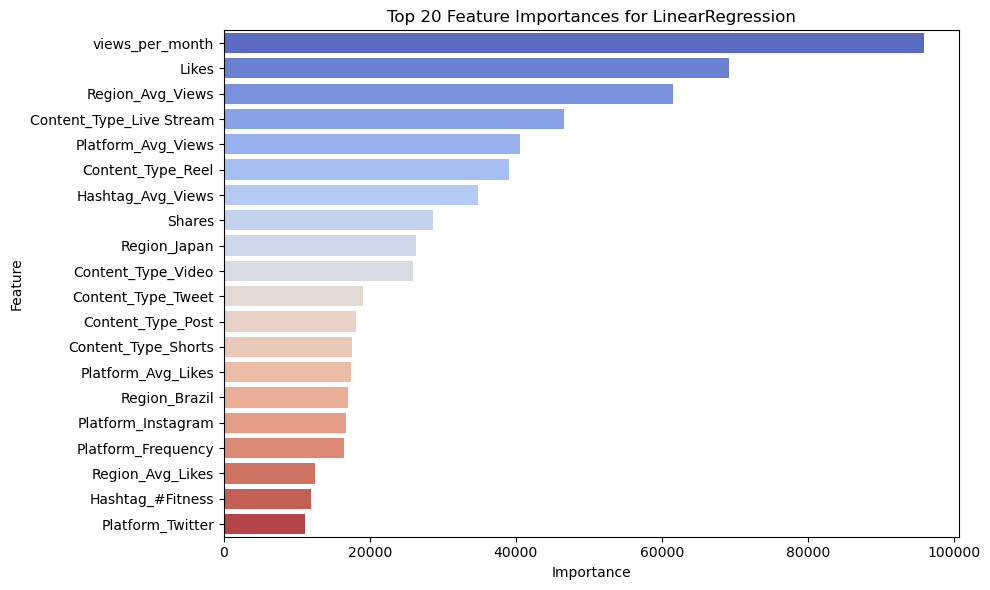


Feature Importances for Ridge_1:
                     Feature    Importance
21           views_per_month  95960.691257
0                      Likes  69240.526846
5           Region_Avg_Views  61529.110947
47  Content_Type_Live Stream  46477.383922
4         Platform_Avg_Views  40606.876005
49         Content_Type_Reel  39083.980394
3          Hashtag_Avg_Views  34832.157041
1                     Shares  28656.893475
44              Region_Japan  26280.945164
52        Content_Type_Video  25911.188962


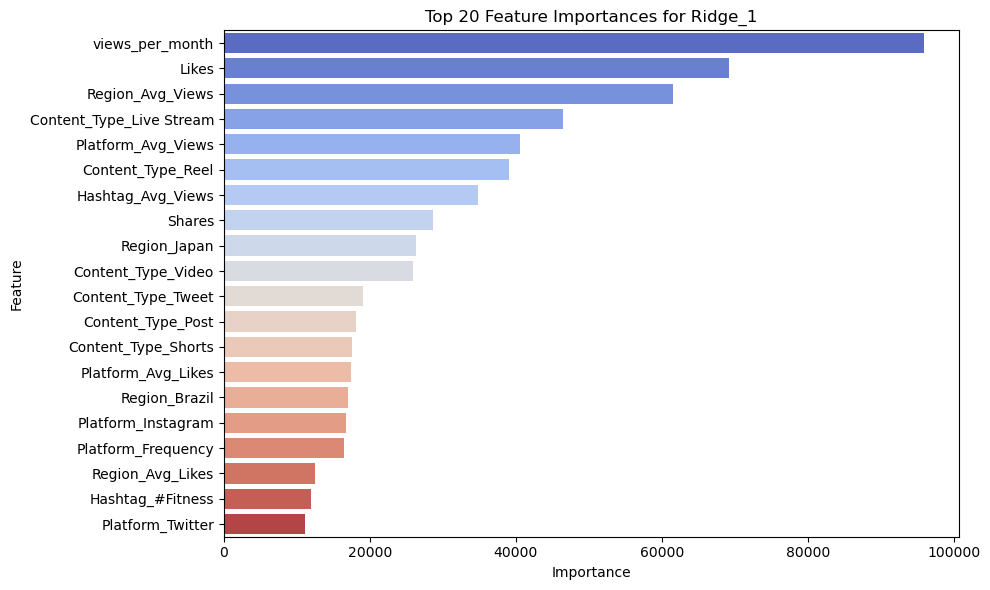


Feature Importances for Ridge_10:
                     Feature    Importance
21           views_per_month  95675.541531
0                      Likes  69079.535257
5           Region_Avg_Views  61305.481548
47  Content_Type_Live Stream  45872.323762
4         Platform_Avg_Views  40539.667161
49         Content_Type_Reel  38574.269149
3          Hashtag_Avg_Views  34744.236265
1                     Shares  28599.648441
44              Region_Japan  25996.915133
52        Content_Type_Video  25546.601014


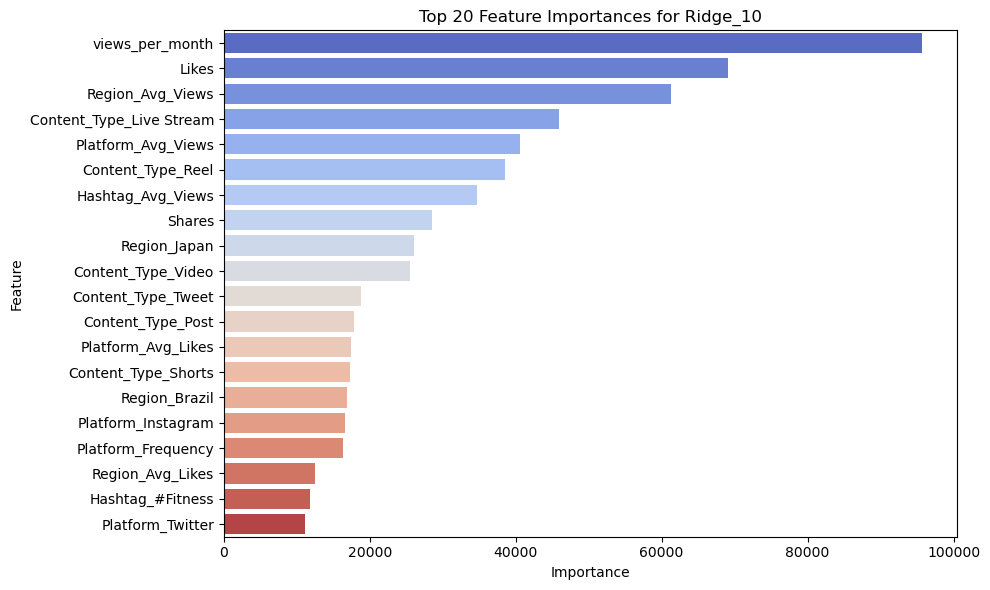


Feature Importances for Ridge_100:
                     Feature    Importance
21           views_per_month  92929.689160
0                      Likes  67503.628259
5           Region_Avg_Views  59246.556962
47  Content_Type_Live Stream  40602.751615
4         Platform_Avg_Views  39882.118960
49         Content_Type_Reel  34140.324989
3          Hashtag_Avg_Views  33880.671233
1                     Shares  28030.802809
44              Region_Japan  23494.205025
52        Content_Type_Video  22421.518728


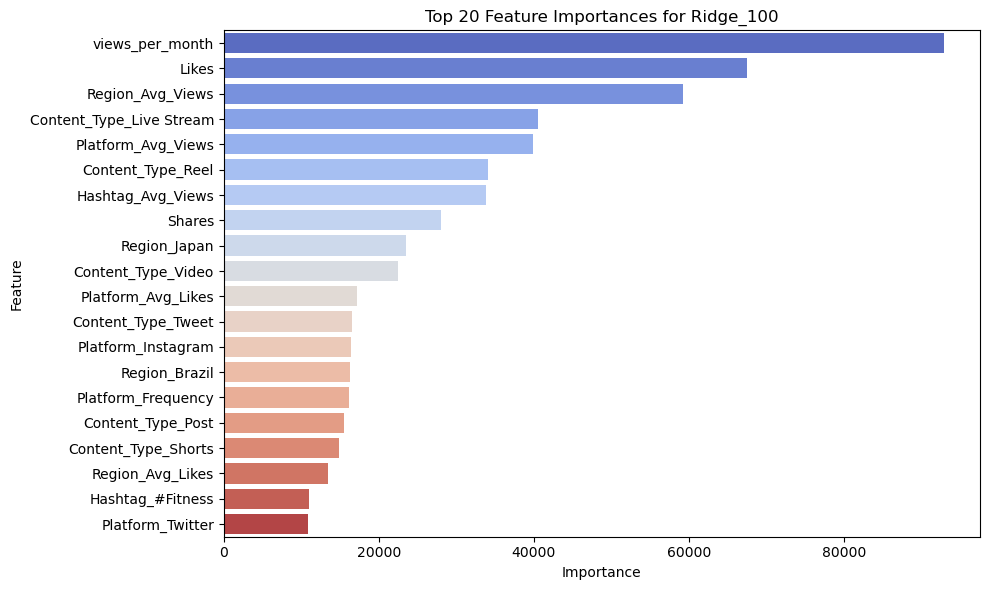


=== Regression Baseline Models on Likes ===

🔵 Training LinearRegression ...
   Test MAE: 126583.04 | Test RMSE: 146510.03 | Test R2: -0.01

🔵 Training Ridge_1 ...
   Test MAE: 126583.15 | Test RMSE: 146509.61 | Test R2: -0.01

🔵 Training Ridge_10 ...
   Test MAE: 126584.22 | Test RMSE: 146505.94 | Test R2: -0.01

🔵 Training Ridge_100 ...
   Test MAE: 126595.16 | Test RMSE: 146472.94 | Test R2: -0.01

📘 Regression Baseline Results:
           Model     Train MAE    Train RMSE  Train R2      Test MAE     Test RMSE   Test R2
LinearRegression 123113.637408 142888.403442  0.013478 126583.044712 146510.027985 -0.007820
         Ridge_1 123113.844356 142888.403569  0.013478 126583.148601 146509.614613 -0.007815
        Ridge_10 123115.689834 142888.415910  0.013478 126584.224859 146505.939084 -0.007764
       Ridge_100 123133.378407 142889.462499  0.013463 126595.156632 146472.940908 -0.007310

Feature Importances for LinearRegression:
                     Feature    Importance
22          

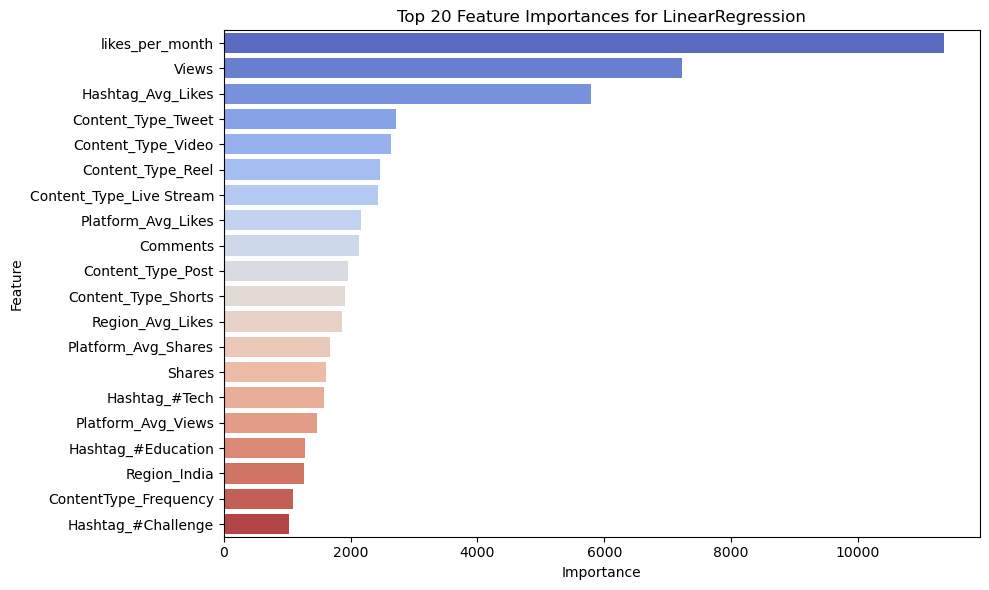


Feature Importances for Ridge_1:
                     Feature    Importance
22           likes_per_month  11351.246895
0                      Views   7229.709881
6          Hashtag_Avg_Likes   5784.455576
51        Content_Type_Tweet   2717.319000
52        Content_Type_Video   2632.397524
49         Content_Type_Reel   2459.687361
47  Content_Type_Live Stream   2421.090992
7         Platform_Avg_Likes   2158.397061
2                   Comments   2134.945501
48         Content_Type_Post   1961.243742


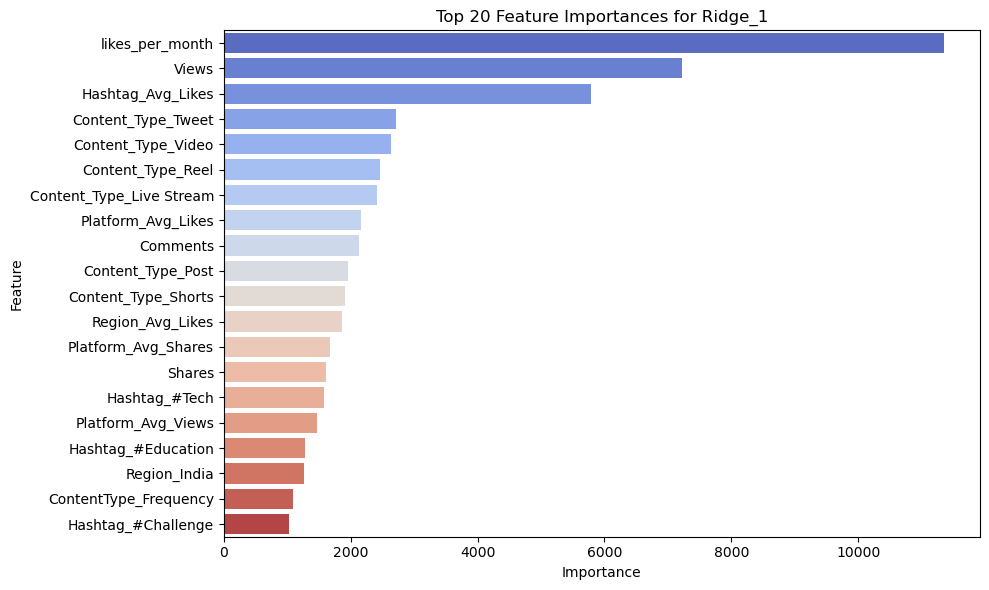


Feature Importances for Ridge_10:
                     Feature    Importance
22           likes_per_month  11318.946953
0                      Views   7212.842274
6          Hashtag_Avg_Likes   5766.792854
51        Content_Type_Tweet   2678.796045
52        Content_Type_Video   2591.252109
49         Content_Type_Reel   2427.453733
47  Content_Type_Live Stream   2385.922306
7         Platform_Avg_Likes   2156.260302
2                   Comments   2129.609999
48         Content_Type_Post   1936.230840


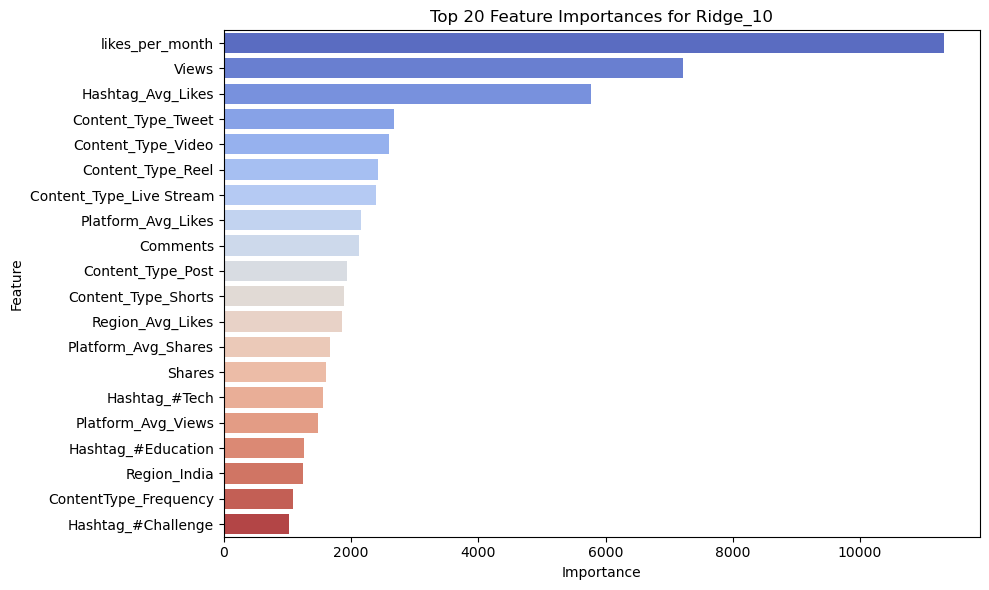


Feature Importances for Ridge_100:
                     Feature    Importance
22           likes_per_month  11008.204375
0                      Views   7047.775955
6          Hashtag_Avg_Likes   5600.666818
51        Content_Type_Tweet   2347.694896
52        Content_Type_Video   2239.344200
49         Content_Type_Reel   2147.618859
7         Platform_Avg_Likes   2135.106445
47  Content_Type_Live Stream   2080.271792
2                   Comments   2077.543342
8           Region_Avg_Likes   1833.905490


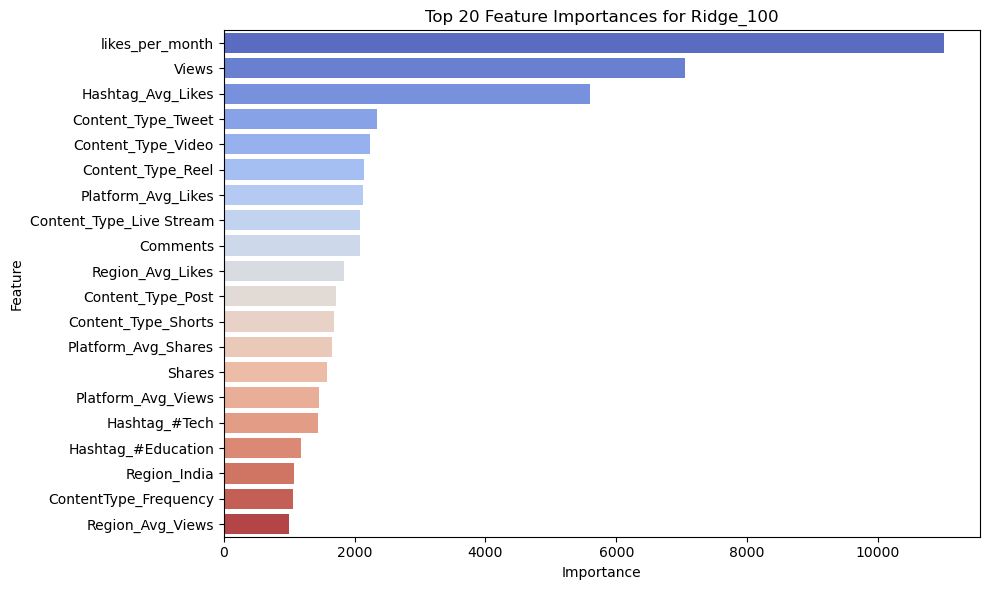


=== Regression Baseline Models on Comments ===

🔵 Training LinearRegression ...
   Test MAE: 12638.82 | Test RMSE: 14653.02 | Test R2: -0.01

🔵 Training Ridge_1 ...
   Test MAE: 12638.81 | Test RMSE: 14652.98 | Test R2: -0.01

🔵 Training Ridge_10 ...
   Test MAE: 12638.72 | Test RMSE: 14652.60 | Test R2: -0.01

🔵 Training Ridge_100 ...
   Test MAE: 12637.94 | Test RMSE: 14649.13 | Test R2: -0.01

📘 Regression Baseline Results:
           Model    Train MAE   Train RMSE  Train R2     Test MAE    Test RMSE   Test R2
LinearRegression 12203.346430 14155.806552  0.010998 12638.824941 14653.017324 -0.010799
         Ridge_1 12203.355907 14155.806559  0.010998 12638.814276 14652.975421 -0.010793
        Ridge_10 12203.441261 14155.807180  0.010998 12638.719501 14652.601477 -0.010741
       Ridge_100 12204.318581 14155.863313  0.010990 12637.937426 14649.129367 -0.010262

Feature Importances for LinearRegression:
                     Feature   Importance
24        comments_per_month  1151.674

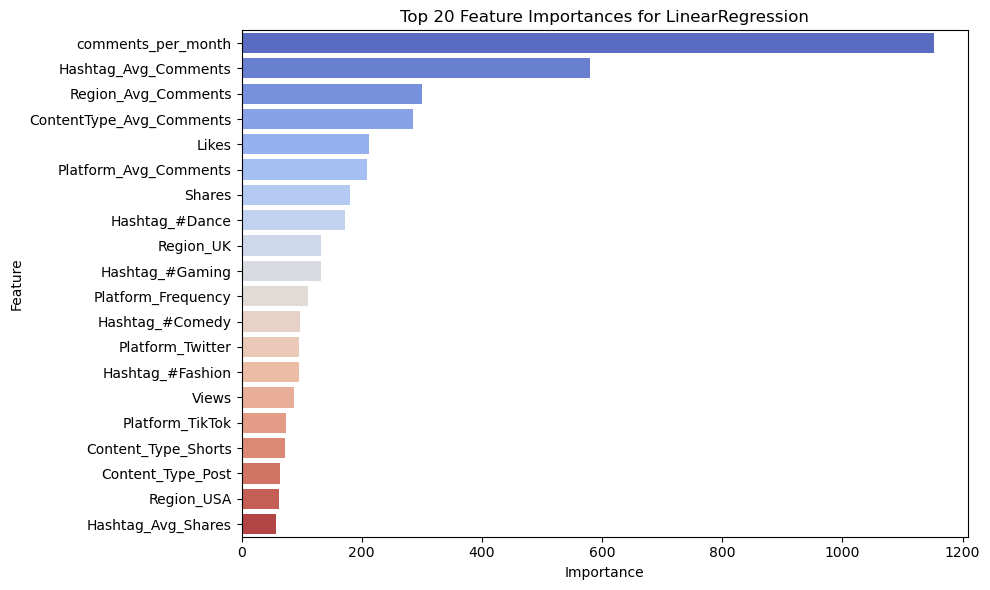


Feature Importances for Ridge_1:
                     Feature   Importance
24        comments_per_month  1151.358756
12      Hashtag_Avg_Comments   579.368094
14       Region_Avg_Comments   300.674721
15  ContentType_Avg_Comments   285.861348
1                      Likes   211.772185
13     Platform_Avg_Comments   208.251752
2                     Shares   179.880909
31            Hashtag_#Dance   171.644821
45                 Region_UK   132.780742
35           Hashtag_#Gaming   132.211656


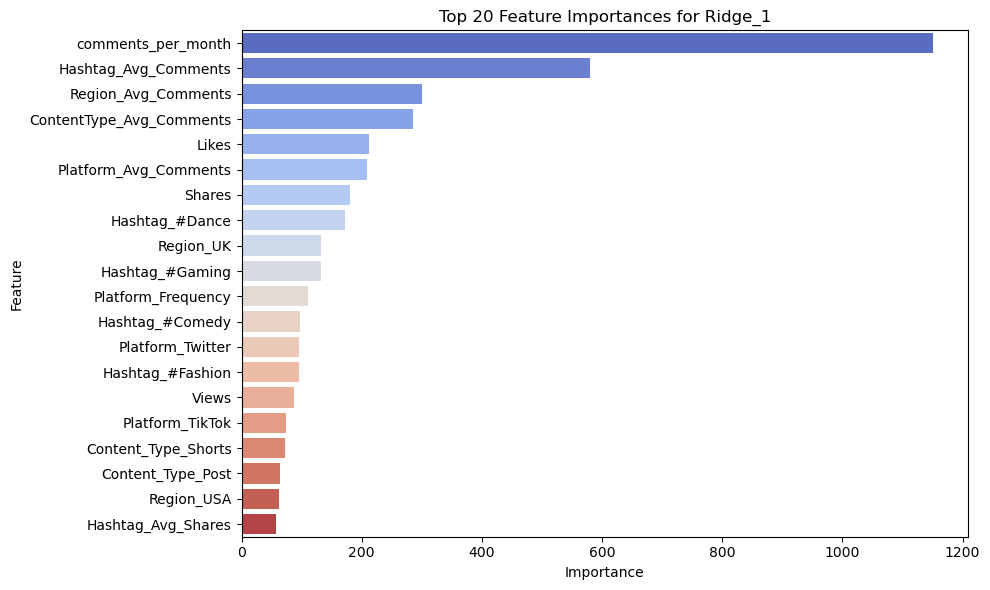


Feature Importances for Ridge_10:
                     Feature   Importance
24        comments_per_month  1148.523721
12      Hashtag_Avg_Comments   577.711073
14       Region_Avg_Comments   299.711645
15  ContentType_Avg_Comments   285.309335
1                      Likes   211.239996
13     Platform_Avg_Comments   207.808553
2                     Shares   179.418138
31            Hashtag_#Dance   169.799113
45                 Region_UK   131.863924
35           Hashtag_#Gaming   130.835721


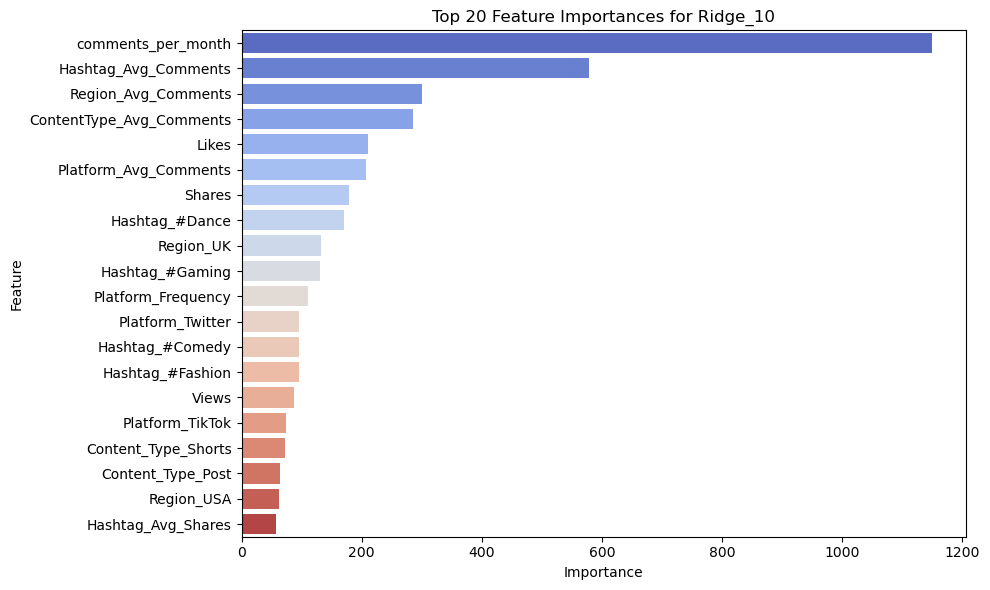


Feature Importances for Ridge_100:
                     Feature   Importance
24        comments_per_month  1121.017244
12      Hashtag_Avg_Comments   561.791031
14       Region_Avg_Comments   290.715115
15  ContentType_Avg_Comments   279.930178
1                      Likes   206.048803
13     Platform_Avg_Comments   203.539930
2                     Shares   174.924910
31            Hashtag_#Dance   154.582084
45                 Region_UK   123.596019
35           Hashtag_#Gaming   119.353241


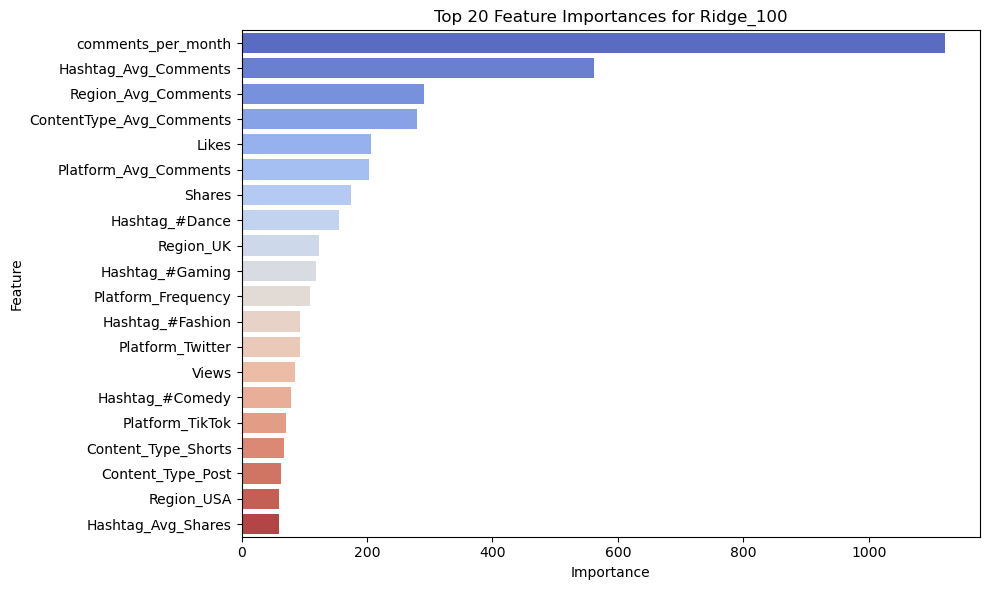


=== Regression Baseline Models on Shares ===

🔵 Training LinearRegression ...
   Test MAE: 25306.43 | Test RMSE: 29188.36 | Test R2: -0.02

🔵 Training Ridge_1 ...
   Test MAE: 25306.34 | Test RMSE: 29188.21 | Test R2: -0.02

🔵 Training Ridge_10 ...
   Test MAE: 25305.45 | Test RMSE: 29186.83 | Test R2: -0.02

🔵 Training Ridge_100 ...
   Test MAE: 25297.33 | Test RMSE: 29174.33 | Test R2: -0.02

📘 Regression Baseline Results:
           Model    Train MAE   Train RMSE  Train R2     Test MAE    Test RMSE   Test R2
LinearRegression 25080.678691 28930.247547  0.010559 25306.434924 29188.363818 -0.021432
         Ridge_1 25080.708854 28930.247591  0.010559 25306.335734 29188.208396 -0.021421
        Ridge_10 25080.977659 28930.251808  0.010558 25305.450129 29186.825584 -0.021324
       Ridge_100 25083.564474 28930.588906  0.010535 25297.329053 29174.327807 -0.020450

Feature Importances for LinearRegression:
                     Feature   Importance
23          shares_per_month  2206.03764

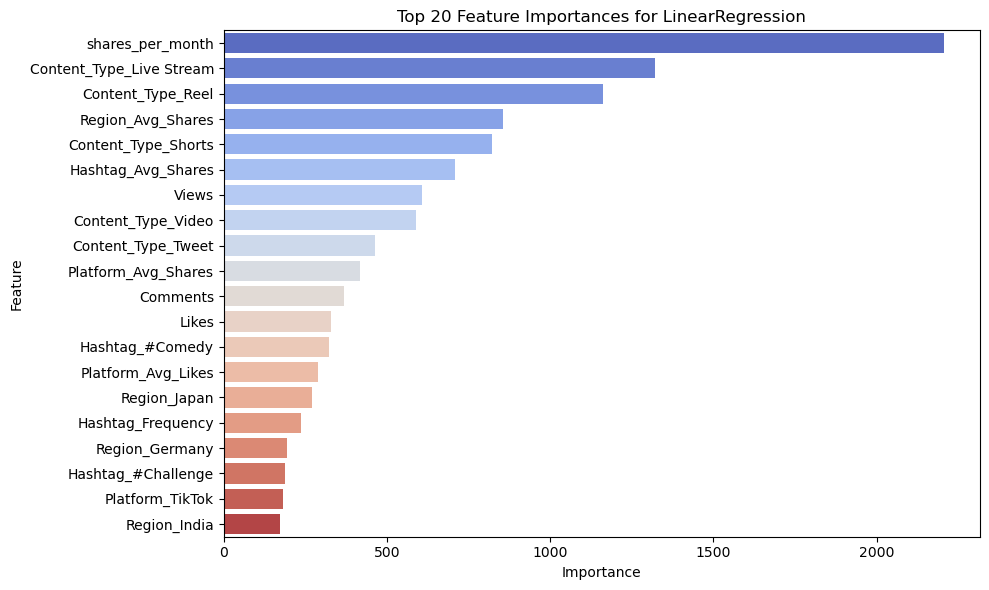


Feature Importances for Ridge_1:
                     Feature   Importance
23          shares_per_month  2205.350686
47  Content_Type_Live Stream  1317.906595
49         Content_Type_Reel  1160.864886
11         Region_Avg_Shares   856.222511
50       Content_Type_Shorts   819.417745
9         Hashtag_Avg_Shares   709.435256
0                      Views   606.716861
52        Content_Type_Video   588.483181
51        Content_Type_Tweet   462.576029
10       Platform_Avg_Shares   416.053240


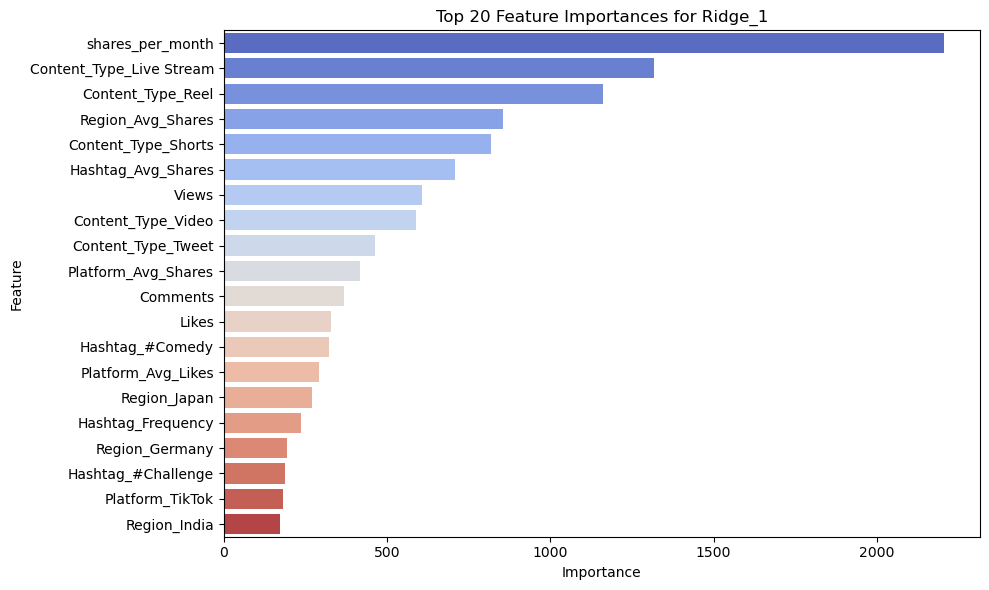


Feature Importances for Ridge_10:
                     Feature   Importance
23          shares_per_month  2199.195500
47  Content_Type_Live Stream  1299.774765
49         Content_Type_Reel  1144.890223
11         Region_Avg_Shares   853.799182
50       Content_Type_Shorts   807.178826
9         Hashtag_Avg_Shares   706.620278
0                      Views   605.496098
52        Content_Type_Video   579.695764
51        Content_Type_Tweet   455.937757
10       Platform_Avg_Shares   415.436456


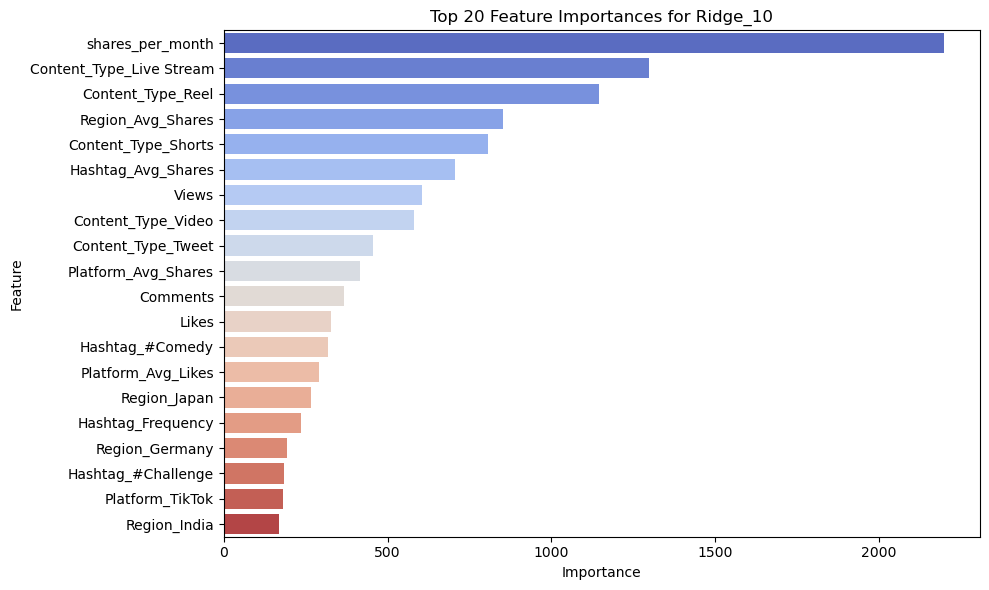


Feature Importances for Ridge_100:
                     Feature   Importance
23          shares_per_month  2140.150970
47  Content_Type_Live Stream  1142.676084
49         Content_Type_Reel  1006.723837
11         Region_Avg_Shares   830.986290
50       Content_Type_Shorts   701.923949
9         Hashtag_Avg_Shares   680.860213
0                      Views   593.366163
52        Content_Type_Video   504.367720
10       Platform_Avg_Shares   409.272786
51        Content_Type_Tweet   398.860759


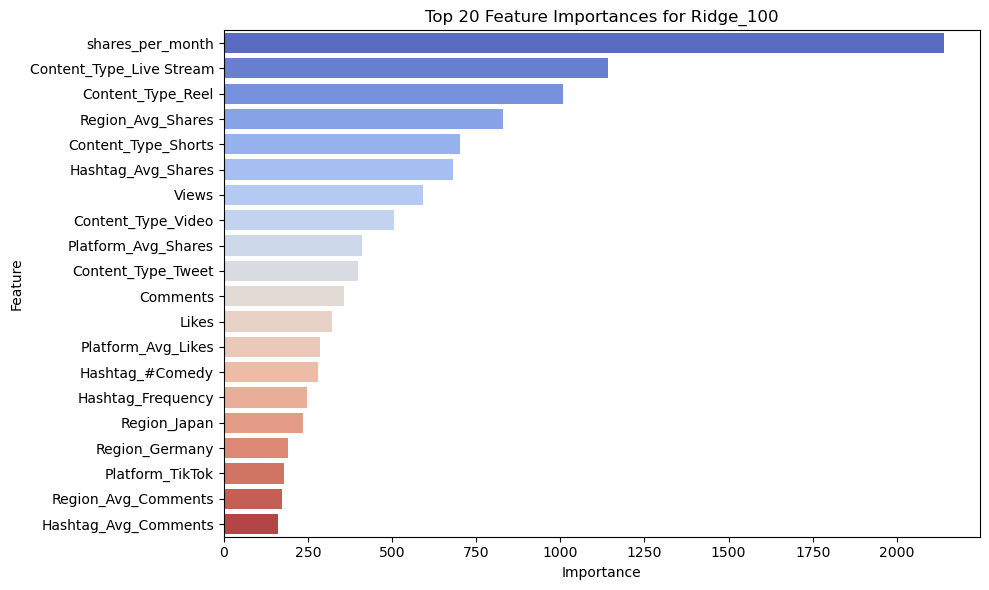


=== Classification Baseline Models ===

🟢 Training LogisticRegression ...
   Test Accuracy: 0.77 | Test Precision: 0.83 | Test Recall: 0.77 | Test F1: 0.79

================ TRAIN METRICS ================

              precision    recall  f1-score   support

           0       0.18      0.66      0.28       153
           1       0.40      0.37      0.38       450
           2       0.96      0.84      0.90      3181

    accuracy                           0.78      3784
   macro avg       0.51      0.62      0.52      3784
weighted avg       0.86      0.78      0.81      3784


================ TEST METRICS ================

              precision    recall  f1-score   support

           0       0.15      0.50      0.23        42
           1       0.29      0.23      0.26       118
           2       0.94      0.86      0.90       786

    accuracy                           0.77       946
   macro avg       0.46      0.53      0.46       946
weighted avg       0.83      0.77    

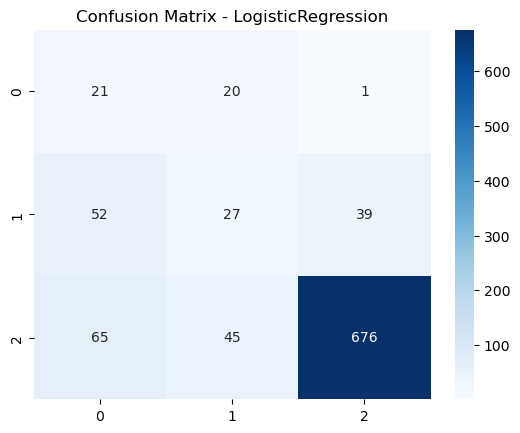


🟢 Training DecisionTree ...
   Test Accuracy: 0.75 | Test Precision: 0.83 | Test Recall: 0.75 | Test F1: 0.78

================ TRAIN METRICS ================

              precision    recall  f1-score   support

           0       0.21      0.86      0.33       153
           1       0.42      0.39      0.41       450
           2       0.96      0.83      0.89      3181

    accuracy                           0.78      3784
   macro avg       0.53      0.69      0.54      3784
weighted avg       0.87      0.78      0.81      3784


================ TEST METRICS ================

              precision    recall  f1-score   support

           0       0.18      0.60      0.28        42
           1       0.28      0.28      0.28       118
           2       0.94      0.83      0.88       786

    accuracy                           0.75       946
   macro avg       0.47      0.57      0.48       946
weighted avg       0.83      0.75      0.78       946


============== TEST CONFUSI

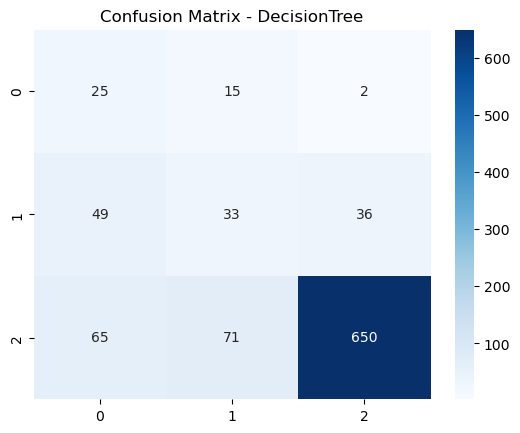


📗 Classification Baseline Results:
             Model  Train Accuracy  Train Precision  Train Recall  Train F1 Score  Test Accuracy  Test Precision  Test Recall  Test F1 Score
LogisticRegression        0.778277         0.859384      0.778277        0.810013       0.765328        0.827813     0.765328       0.790325
      DecisionTree        0.776427         0.868738      0.776427        0.810070       0.748414        0.827552     0.748414       0.779787

Feature Importances (Classification) - LogisticRegression
                     Feature  Importance
10     Platform_Avg_Comments    0.698580
24          Platform_Twitter    0.432641
7        Platform_Avg_Shares    0.397040
23           Platform_TikTok    0.265061
14        Platform_Frequency    0.262022
33            Hashtag_#Music    0.195005
1         Platform_Avg_Views    0.192117
25          Platform_YouTube    0.161362
35            Hashtag_#Viral    0.141146
44  Content_Type_Live Stream    0.129282


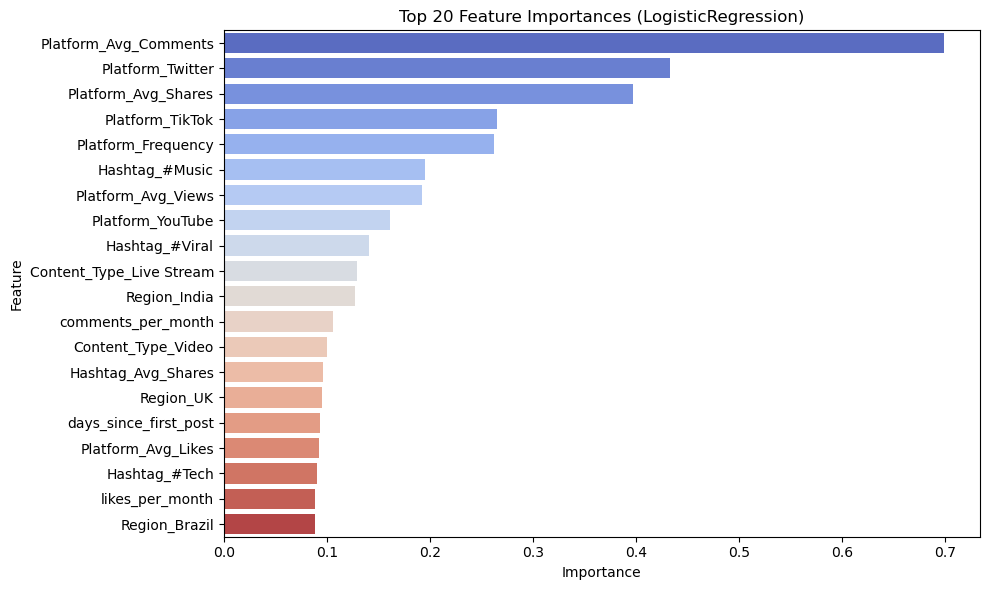


Feature Importances (Classification) - DecisionTree
                Feature  Importance
0     Hashtag_Avg_Views        0.02
1    Platform_Avg_Views        0.02
2      Region_Avg_Views        0.02
3     Hashtag_Avg_Likes        0.02
4    Platform_Avg_Likes        0.02
5      Region_Avg_Likes        0.02
6    Hashtag_Avg_Shares        0.02
7   Platform_Avg_Shares        0.02
8     Region_Avg_Shares        0.02
9  Hashtag_Avg_Comments        0.02


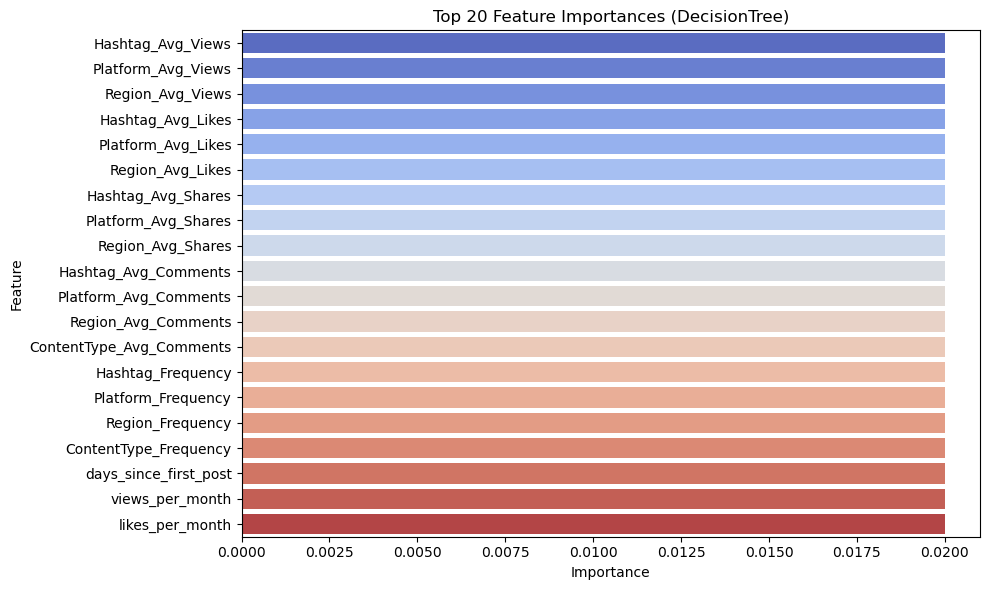

In [35]:
# Regression Models on Views
print("\n=== Regression Baseline Models on Views ===")
reg_views_model = SupervisedBaselineModels(X_train_reg_views, X_test_reg_views, y_train_reg_views, y_test_reg_views, feature_names_reg_views, task='regression', pred='views')
reg_views_model.train_and_evaluate()
reg_views_model.results()
reg_views_model.feature_importance()

# Regression Models on Likes
print("\n=== Regression Baseline Models on Likes ===")
reg_likes_model = SupervisedBaselineModels(X_train_reg_likes, X_test_reg_likes, y_train_reg_likes, y_test_reg_likes, feature_names_reg_likes, task='regression', pred='likes')
reg_likes_model.train_and_evaluate()
reg_likes_model.results()
reg_likes_model.feature_importance()

# Regression Models on Comments
print("\n=== Regression Baseline Models on Comments ===")
reg_comments_model = SupervisedBaselineModels(X_train_reg_comments, X_test_reg_comments, y_train_reg_comments, y_test_reg_comments, feature_names_reg_comments, task='regression', pred='shares')
reg_comments_model.train_and_evaluate()
reg_comments_model.results()
reg_comments_model.feature_importance()

# Regression Models on Shares
print("\n=== Regression Baseline Models on Shares ===")
reg_shares_model = SupervisedBaselineModels(X_train_reg_shares, X_test_reg_shares, y_train_reg_shares, y_test_reg_shares, feature_names_reg_shares, task='regression', pred='comments')
reg_shares_model.train_and_evaluate()
reg_shares_model.results()
reg_shares_model.feature_importance()

# Classification Models
print("\n=== Classification Baseline Models ===")
cls_model = SupervisedBaselineModels(X_train_cls, X_test_cls, y_train_cls, y_test_cls, feature_names_cls, task='classification', pred='enagegement_level')
cls_model.train_and_evaluate()  
cls_model.results()
cls_model.feature_importance()